Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from math import sqrt

Lecture des donness

In [25]:
data_frame = None
file_path = '../heart.csv'
if file_path.endswith('.csv'):
    data_frame = pd.read_csv(file_path)
elif file_path.endswith('.arff'):
    raw_data = loadarff(file_path)
    data_frame = pd.DataFrame(raw_data[0])
else:
    print("Format de fichier non pris en charge.")

print(data_frame.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


Preprocessing des donnees

In [26]:
attributs = data_frame.columns
print(attributs)
for attribut in data_frame.columns:
    a = data_frame[attribut]
    if a.dtype == "object":
        data_frame.replace('?', a.mode().values[0], inplace=True)
    else:
        data_frame.replace('?', a.mean(), inplace=True)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


Elbow method

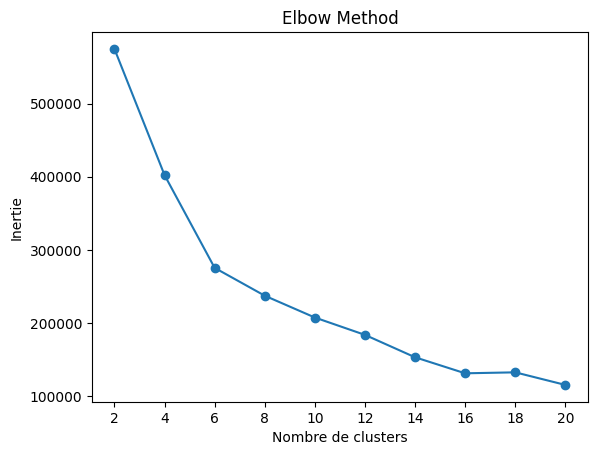

In [27]:
data = data_frame.values
results = {}

for i in range(2, 21, 2):
    model = KMeans(n_clusters=i, n_init="auto").fit(data)
    results[i] = round(model.inertia_, 2)

clusters = list(results.keys())
inertia = list(results.values())
plt.plot(clusters, inertia, marker='o')
plt.xticks(clusters)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Elbow Method')
plt.show()

Algorithm AGNES

In [28]:
agnes_algo = AgglomerativeClustering(n_clusters=13, linkage='ward')
model = agnes_algo.fit(data)

Histogramme des inerties des 5 methodes (K_means, K_medoids, Agnes, Diana et DBScan)

In [34]:
def distance_euclidienne(a, b):
    dist = []
    for i in range(len(a)):
        dist.append((a[i] - b[i])**2)
    
    return sqrt(sum(dist))

kmeans_model = KMeans(n_clusters=13, n_init="auto").fit(data)
kmedoids_model = KMedoids(n_clusters=13).fit(data)
agnes_model = AgglomerativeClustering(n_clusters=13).fit(data)


# distance inter-classes kmeans
distance_inter_classe_kmeans = round(kmeans_model.inertia_, 2)
# distance inter-classes kmedoids
distance_inter_classe_kmedoid = round(kmedoids_model.inertia_, 2)
# distance inter-classes agnes
distance_inter_classe_agnes = round(agnes_model.compute_distances  , 2)

# distance intra-classe kmeans
centroids_coords = {}
distance_intra_classe_kmeans = 0

for index, i in enumerate(kmeans_model.cluster_centers_):
    centroids_coords[index] = i

for centroid_1 in centroids_coords:
    for centroid_2 in centroids_coords:
        if centroid_1 != centroid_2:
            dist = distance_euclidienne(centroids_coords[centroid_1], centroids_coords[centroid_2]) 
            distance_intra_classe_kmeans += dist

distance_intra_classe_kmeans = round(distance_intra_classe_kmeans, 2)

# distance intra-classe kmedoids
centroids_coords = {}
distance_intra_classe_kmedoid = 0

for index, i in enumerate(kmedoids_model.cluster_centers_):
    centroids_coords[index] = i

for centroid_1 in centroids_coords:
    for centroid_2 in centroids_coords:
        if centroid_1 != centroid_2:
            dist = distance_euclidienne(centroids_coords[centroid_1], centroids_coords[centroid_2]) 
            distance_intra_classe_kmedoid += dist

distance_intra_classe_kmedoid = round(distance_intra_classe_kmedoid, 2)

# # distance intra-classe agnes
# centroids_coords = {}
# distance_intra_classe_agnes = 0

# for index, i in enumerate(agnes_model.cluster_centers_):
#     centroids_coords[index] = i

# for centroid_1 in centroids_coords:
#     for centroid_2 in centroids_coords:
#         if centroid_1 != centroid_2:
#             dist = distance_euclidienne(centroids_coords[centroid_1], centroids_coords[centroid_2]) 
#             distance_intra_classe_agnes += dist

# distance_intra_classe_agnes = round(distance_intra_classe_agnes, 2)

print("Distance inter-classe KMeans: ", distance_inter_classe_kmeans)
print("Distance inter-classe KMedoids: ", distance_inter_classe_kmedoid)
print("Distance inter-classe Agnes: ", distance_inter_classe_agnes)
print("Distance intra-classe KMeans: ", distance_intra_classe_kmeans)
print("Distance intra-classe KMedoids: ", distance_intra_classe_kmedoid)
# print("Distance intra-classe Agnes: ", distance_intra_classe_agnes)

Distance inter-classe KMeans:  175110.29
Distance inter-classe KMedoids:  7084.15
Distance inter-classe Agnes:  0
Distance intra-classe KMeans:  13934.59
Distance intra-classe KMedoids:  8973.12
